<a href="https://colab.research.google.com/github/Dhyeonle9/deep-learning-practice/blob/main/231205_01_Thoracic_Surgery_practice%20%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# pandas 라이브러리를 임포트합니다. 데이터프레임을 다루기 위한 라이브러리입니다.
import pandas as pd

# scikit-learn 라이브러리에서 필요한 모듈들을 임포트합니다.
from sklearn.model_selection import train_test_split  # 데이터를 학습용과 테스트용으로 나누는 모듈
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # 데이터 전처리를 위한 모듈
from sklearn.compose import ColumnTransformer  # 열에 따라 전처리 방법을 다르게 적용하는 모듈
from sklearn.pipeline import Pipeline  # 전처리 과정을 파이프라인으로 구성하는 모듈

# 위의 코드는 데이터를 준비하고 전처리하는 데 사용됩니다. 아래에 자세한 설명을 제공하겠습니다.

# 1. 데이터 준비: 일반적으로 데이터는 데이터프레임 형태로 로드하고 준비합니다.
# 이 코드에서는 pandas를 사용하여 데이터를 불러올 것으로 예상됩니다.

# 2. 데이터 분할: train_test_split 함수는 데이터를 학습용과 테스트용으로 무작위로 나누는 역할을 합니다.
# 이를 통해 모델을 학습하고 평가할 수 있습니다.
# over-fitting(과적합)을 막기 위해
# under-fitting(과소적합): 학습 부족

# 3. 전처리: 머신러닝 모델에 데이터를 입력하기 전에 데이터를 전처리해야 합니다.
# - StandardScaler: 연속형 특성을 표준화하여 평균이 0이고 표준편차가 1이 되도록 스케일링합니다.
# - OneHotEncoder: 범주형 특성을 원-핫 인코딩하여 숫자형 데이터로 변환합니다.
# - ColumnTransformer: 열마다 다른 전처리 방법을 적용할 수 있도록 합니다.

# 4. 파이프라인: 전처리 단계를 순차적으로 적용하는 방법을 제공합니다.
# 파이프라인을 사용하면 코드를 깔끔하게 구성하고 재사용성을 높일 수 있습니다.

In [45]:
# 데이터 불러오기
data = pd.read_csv('https://raw.githubusercontent.com/BigDeepData/2312_dl/main/data/ThoraricSurgery.csv')
# github에서 raw 링크 가져와야지 사용가

In [46]:
data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [47]:
data.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [49]:
data.set_index('id', inplace=True)

In [50]:
data

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F


In [51]:
# 데이터 전처리를 위한 파이프라인 설정

# 연속형 특성 전처리 파이프라인
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# 범주형 특성 전처리 파이프라인
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [52]:
# 특성과 라벨 분리
X = data.drop('Risk1Yr', axis=1)  # 'Risk1Yr'은 예측하려는 타겟 변수의 컬럼명
y = data['Risk1Yr'].map({'T': 1, 'F': 0})  # 'T'를 1로, 'F'를 0으로 매핑

In [72]:
X

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
id,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60
2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51
3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59
4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54
5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63
467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61
468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52


In [73]:
y

id
1      0
2      0
3      0
4      0
5      1
      ..
466    0
467    0
468    0
469    0
470    0
Name: Risk1Yr, Length: 470, dtype: int64

In [53]:
# ColumnTransformer를 사용하여 열별로 다른 전처리 방법 적용

# - numeric_transformer: 연속형 특성에 대한 스케일링을 적용합니다.
# - categorical_transformer: 범주형 특성에 대한 원-핫 인코딩을 적용합니다.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(exclude='object').columns),
        ('cat', categorical_transformer, X.select_dtypes(include='object').columns)])

In [54]:
# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터 전처리 파이프라인을 사용하여 학습 데이터와 테스트 데이터를 전처리합니다.
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [55]:
X_train.shape

(376, 36)

In [74]:
y_test.shape

(94,)

In [56]:
len(X_train[1])

36

In [57]:
# Keras에서 모델을 생성하는 코드

# Sequential 모델을 생성합니다. Sequential 모델은 간단한 신경망을 순차적으로 쌓을 때 사용합니다.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Dense 레이어를 추가하여 모델을 구성합니다. 이 레이어는 fully connected 레이어를 나타냅니다.

# - 첫 번째 Dense 레이어:
#   - 12개의 뉴런을 가집니다.
#   - 입력 특성 수에 맞는 input_dim을 설정합니다.
#   - 활성화 함수로 ReLU(렐루)를 사용합니다. ReLU는 음수 값을 0으로 만들고 양수 값을 그대로 반환합니다.
#   - 입력 레이어로 사용되므로 input_dim은 X_train의 마지막 차원과 동일합니다.
model.add(Dense(12, input_dim=len(X_train[1]), activation='relu'))
# - 두 번째 Dense 레이어:
#   - 8개의 뉴런을 가집니다.
#   - 활성화 함수로 ReLU를 사용합니다.
model.add(Dense(8, activation='relu'))
# - 세 번째 Dense 레이어:
#   - 하나의 출력 뉴런을 가집니다.
#   - 활성화 함수로 Sigmoid를 사용합니다. 이진 분류를 위한 출력 레이어입니다.
model.add(Dense(1, activation='sigmoid'))

# 모델 요약 정보를 출력합니다. 각 레이어의 구성과 파라미터 수 등을 확인할 수 있습니다.
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                444       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 557 (2.18 KB)
Trainable params: 557 (2.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# 모델 컴파일
# - loss: 모델의 손실 함수를 설정합니다. 이진 분류 작업에는 'binary_crossentropy'가 일반적으로 사용됩니다.
#   이 함수는 이진 분류 문제의 로스 함수로, 예측값과 실제값 간의 차이를 계산합니다.
# - optimizer: 모델의 최적화 알고리즘을 설정합니다. 'adam'은 일반적으로 사용되는 최적화 알고리즘 중 하나입니다.
#   'adam'은 적응형 학습률을 사용하여 모델을 빠르게 수렴시키는 데 도움을 줍니다.
# - metrics: 모델의 성능 지표를 설정합니다. 여기서는 'accuracy'만 설정되었으며, 모델의 정확도를 모니터링합니다.
#   정확도는 올바르게 분류된 샘플의 비율을 나타냅니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [61]:
# 모델 학습
# - X_train과 y_train은 학습 데이터와 해당 데이터의 라벨(타겟)입니다.
# - epochs: 전체 학습 데이터셋을 몇 번 반복하여 학습할지 설정합니다. 에폭 수가 높을수록 모델이 더 많은 학습을 수행합니다.
# - batch_size: 한 번에 모델에 공급되는 데이터 샘플의 개수입니다. 작은 배치 크기는 메모리 사용량을 줄이고 학습 과정을 안정화시킬 수 있습니다.
#   일반적으로 미니배치 경사 하강법을 사용하며, 배치 크기에 따라 학습 속도와 안정성이 변할 수 있습니다.
hist = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
38/38 [==============================] - 0s 8ms/step - loss: 0.2011 - accuracy: 0.9362
Epoch 2/150
38/38 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9362
Epoch 3/150
38/38 [==============================] - 0s 10ms/step - loss: 0.1996 - accuracy: 0.9362
Epoch 4/150
38/38 [==============================] - 0s 6ms/step - loss: 0.2006 - accuracy: 0.9388
Epoch 5/150
38/38 [==============================] - 0s 5ms/step - loss: 0.2001 - accuracy: 0.9362
Epoch 6/150
38/38 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.9388
Epoch 7/150
38/38 [==============================] - 0s 4ms/step - loss: 0.1972 - accuracy: 0.9362
Epoch 8/150
38/38 [==============================] - 0s 4ms/step - loss: 0.1958 - accuracy: 0.9388
Epoch 9/150
38/38 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 0.9388
Epoch 10/150
38/38 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.9388
Epoch 1

In [67]:
# 모델 평가
# - X_test와 y_test는 모델을 평가할 때 사용되는 테스트 데이터와 해당 데이터의 실제 라벨(타겟)입니다.
# - model.evaluate 메서드는 테스트 데이터를 사용하여 모델의 성능을 평가하고, 손실 값과 지정된 메트릭(여기서는 정확도)을 반환합니다.
# - 반환된 정확도는 백분율로 나타내어 모델의 성능을 해석하기 쉽게 합니다.
_, accuracy = model.evaluate(X_test, y_test)

# 결과 출력
# - 모델의 정확도를 출력합니다. 정확도는 올바르게 분류된 샘플의 비율을 나타냅니다.
# - 정확도를 백분율로 표시하여 가독성을 높입니다.
print('Accuracy: %.2f%%' % (accuracy * 100))

3/3 [==============================] - 0s 7ms/step - loss: 0.8495 - accuracy: 0.8085
Accuracy: 80.85%


In [70]:
accuracy

0.8085106611251831

<function matplotlib.pyplot.show(close=None, block=None)>

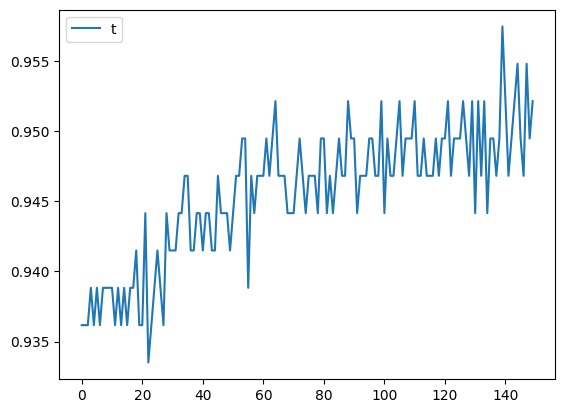

In [76]:
from matplotlib import pyplot as plt

plt.plot(hist.history['accuracy'])
plt.legend('train_accuracy')
plt.show